# Hands-on experiment 3
## Sparsest Cut Problem via Semidefinite Programming

The Uniform Sparsest Cut problem (USC) aims to find a bipartition
$(S, \bar{S})$ of the nodes of a graph $G = (V, E)$,
$\vert V \vert = p$, which minimizes the quantity $$\frac{E(S, \bar{S})}{\lvert S \rvert \; \lvert \bar{S} \rvert},$$
where $E(S, \bar{S})$ is the number of edges connecting $S$ and
$\bar{S}$, and $\lvert S \rvert$ is the number of nodes in $S$. This
problem is of broad interest, with applications in areas such as VLSI
layout design, topological design of communication networks and image
segmentation. Relevant to machine learning, it appears as a subproblem
in hierarchical clustering algorithms
[@Dasgupta2016; @Chatziafratis2018].

Computing such a bipartition is NP-hard and intense research has gone
into designing efficient approximation algorithms for this problem. In
the seminal work of [@Arora2009] an $\mathcal{O}(\sqrt{\log p})$ approximation
algorithm is proposed for solving USC, which relies on finding a
*well-spread* $\ell_2^2$ geometric representation of $G$ where each node
$i\in V$ is mapped to a vector ${\textbf v}_i$ in $\mathbb{R}^p$. In this
experimental section we focus on solving the SDP that computes this
geometric embedding.

The canonical formulation of the SDP is 
\begin{align}
{\boldsymbol X}^\star \in \arg \min_{ {\boldsymbol X} } \bigg\{ \langle \boldsymbol{C}, {\boldsymbol X} \rangle : &~p \; \mathrm{Tr}({\boldsymbol X}) -  \mathrm{Tr}(\mathbf{1}_{p\times p}{\boldsymbol X}) = \frac{p^2}{2}, ~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\longleftarrow ~~\equiv A({\boldsymbol X}) = \frac{p^2}{2}  \\[3mm] 
& \; {\boldsymbol X}_{i,j} + {\boldsymbol X}_{j,k} - {\boldsymbol X}_{i, k} - {\boldsymbol X}_{j,j} \leq 0, \; \forall\ i \neq j \neq k \neq i\in V, ~~~\longleftarrow ~~\equiv B_{i,j,k}({\boldsymbol X}) \in \mathcal{K} = (-\infty, 0] \tag{Problem 2} \\[3mm]
&~\underbrace{\mathrm{Tr}({\boldsymbol X}) \leq p, ~{\boldsymbol X} \in \mathbb{R}^{p\times p} ,~{\boldsymbol X}\succeq 0}_{\mathcal{X}} \bigg\},~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~~\longleftarrow ~~ {\boldsymbol X}  \in \mathcal{X} \text{ (the SDP cone of bounded trace)} 
\end{align}
 where $\boldsymbol{C}$ represents the Laplacian of graph
$G$ and ${\boldsymbol X}_{i,j} = \langle {\textbf v}_{i}, {\textbf v}_j\rangle$ gives the geometric
embedding of the nodes.

We can rewrite the optimization
problem <span class="reference" data-target="Problem 2">2</span> as $$
    \min_{{\boldsymbol X} \in \mathcal{X}} f({\boldsymbol X}) + g(A({\boldsymbol X})) ~~~~~~~~\text{ subject to } ~~~~B_{i,j,k}({\boldsymbol X}) \in \mathcal{K}, \;\forall\ i \neq j \neq k \neq i\in V, \tag{Problem 3}$$
where $f({\boldsymbol X}) = \langle \boldsymbol{C}, {\boldsymbol X} \rangle$ and
$g(\cdot) = \delta_{\left\{\frac{p^2}{2}\right\}}(\cdot)$ is the
indicator function of singleton $\left\{\frac{p^2}{2}\right\}$.

## 3.1 Theory 

#### Question 3.1.1  (5 pts) Count the constraints
    
How many constraints does
<span class="reference" data-target="Problem 2">Problem 2</span> have (as a function of $p$)? How does this
number compare to the one of
<span class="reference" data-target="Problem 1">Problem 1</span> from Part 2?

**N.B.1**: In Part 2 the constraints are expressed in matrix form,
while here they are listed individually. Make sure to take this into
account (e.g., the constraint ${\boldsymbol X} \geq 0$ in Part 2 is applied *for
each* entry).

**N.B.2**: You can respond to this question by either computing the
exact number of constraints, or by identifying the correct order of
magnitude (big-O notation).


<font color="blue">

In Problem 2 for ${\boldsymbol X} \in \mathbb{R}^{p\times p}$, we have the following constraints
    
$$
C1 : \mathrm{Tr}({\boldsymbol X}) -  \mathrm{Tr}(\mathbf{1}_{p\times p}{\boldsymbol X}) = \frac{p^2}{2}
$$

C1 forms 1 constraint because it is for the whole matrix and not any specific indices.
    
$$
C2 : {\boldsymbol X}_{i,j} + {\boldsymbol X}_{j,k} - {\boldsymbol X}_{i, k} - {\boldsymbol X}_{j,j} \leq 0, \; \forall\ i \neq j \neq k \neq i\in V
$$

C2 is uniquely defined for (i,j,k)) $\forall\ i \neq j \neq k \neq i\in V$ so forms p(p-1)(p-2) constraints giving an order of magnitude $\equiv \mathcal{O}(p^3)$ 
    
$$
C3 : \bigg\{~\underbrace{\mathrm{Tr}({\boldsymbol X}) \leq p, ~{\boldsymbol X} \in \mathbb{R}^{p\times p} ,~{\boldsymbol X}\succeq 0}_{\mathcal{X}} \bigg\}
$$
    
In C3, the inequality $\mathrm{Tr}({\boldsymbol X}) \leq p, {\boldsymbol X}\succeq 0$ form 2 constraints

We have already defined ${\boldsymbol X} \in \mathbb{R}^{p\times p}$ to introduce the variable X, so assuming that it is not a constraint.

    
Thus, we get the total constraints = $~\underbrace{ 1}_{C1} + ~\underbrace{p(p-1)(p-2)}_{C2} + ~\underbrace{ 2}_{C3}$ and an overall order of magnitude = $\mathcal{O}(p^3)$ for the total constraints.

    
In Problem 1 from part 2, for ${\boldsymbol X} \in \mathbb{R}^{p\times p}$, we have the following constraints

$$
C1 : \mathbf{X} \mathbf{1} = \mathbf{1} , \mathbf{X^\top} \mathbf{1} =\mathbf{1}
$$
    
C1 refers to the constraint that row and column sums must be 1, since there are p rows and p columns we get 2p constrains from C1.
    
$$
C2 : \mathbf{X} \geq 0
$$

C2 gives $p^2$ constraints because it applies the non-negativity constraint to each element in the matrix ${\boldsymbol X}$

$$
C3 : \mathrm{Tr}(\mathbf{X}) \leq \kappa, ~\mathbf{X} \in \mathbb{R}^{p\times p} ,~\mathbf{X}\succeq 0 
$$
    
Similar to the discussion for problem 2, C3 also gives 2 constrains from $\mathrm{Tr}(\mathbf{X}) \leq \kappa,~\mathbf{X}\succeq 0 $
    
Thus for problem 1 from part 2 we get total constrains = $~\underbrace{ 2p}_{C1} + ~\underbrace{p^2}_{C2} + ~\underbrace{ 2}_{C3}$. So problem 1 has $\mathcal{O}(p^2)$ constraints.


#### Question 3.2.1 (5 pts) Write down the quadratic penalty form

Express the constraints in <span class="reference" data-target="Problem 3">Problem 3</span> in quadratic penalty form and write down the corresponding penalized objective function.


<font color="blue">

As defined earlier in Part 2 we know that given a linear inclusion constraint $Tx \in \mathcal{Y}$,
the corresponding quadratic penalty function is given by

$$\text{QP}_\mathcal{Y}(x) = \text{dist}^2(Tx, \mathcal{Y}) = \min_{y \in \mathcal{Y}} \| y-Tx\|^2.$$
    
Thus from problem 3, the quadratic penalty for $g(A({\boldsymbol X})) = \delta_{\left\{\frac{p^2}{2}\right\}}(A({\boldsymbol X}))$ and $B_{i,j,k}({\boldsymbol X}) \in \mathcal{K} = (-\infty, 0]$ is given by:
$$
\begin{aligned}
\text{QP}_{\left\{\frac{p^2}{2}\right\}}({\boldsymbol X}) &= \text{dist}^2(A({\boldsymbol X}), \{\frac{p^2}{2}\}) = \min_{y \in \left\{\frac{p^2}{2}\right\}} \| y-A({\boldsymbol X})\|^2 =  \| \frac{p^2}{2}-A({\boldsymbol X})\|^2 \\ 
\text{QP}_{\mathcal{K}}({\boldsymbol X}) &= \text{dist}^2(B_{i,j,k}({\boldsymbol X}), \mathcal{K}) \qquad\forall\ i \neq j \neq k \neq i\in V \\ 
\end{aligned}
$$

Summing up the quadratic penalty $\text{dist}^2(B_{i,j,k}({\boldsymbol X}), \mathcal{K})$ over all $\ i \neq j \neq k \neq i\in V$, and using the same parameter $\frac{1}{2\beta}$ as part 2, we get the following penalized objective function
 
$$
\langle \boldsymbol{C}, {\boldsymbol X} \rangle + \frac{1}{2\beta}\| \frac{p^2}{2}-A({\boldsymbol X})\|^2  + \frac{1}{2\beta}\sum\limits_{\ i \neq j \neq k \neq i\in V }\text{dist}^2(B_{i,j,k}({\boldsymbol X}), \mathcal{K})
$$

where $\mathcal{K}= (-\infty, 0]$ and $\boldsymbol{C}$ represents the Laplacian of graph G.

## 3.2 Implementation

We will now observe the behavior of HCGM on three graphs
    from the Network Repository dataset [@Rossi2015]:

-   **G1:** `mammalia-primate-association-13` with $25$ nodes,

-   **G2:** `55n-insecta-ant-colony1-day37` with $55$ nodes and

-   **G3:** `insecta-ant-colony4-day10` with $102$ nodes.

#### Question 3.2.1 (3 points) Estimate the number of constraints

Based on your calculation in point (1), give an estimate of the
number of constraints for each dataset above.


<font color="blue">

No. of constrains for each dataset -
    
G1 (p=25) : 3 + 25*24*23 = 13803
    
G2 (p=55) : 3 + 55*54*53 = 157413

G3 (p=102) : 3 + 102*101*100 = 1030203
 

#### Question 3.2.2 (2 points) Complete the implementation

We provide most of the code for solving this problem below. Use the implementation of `lmo` and `HCGM_update` you completed in Part 2. Run the
algorithm for each dataset (you can cook your dinner in the
meantime). Include the generated plots in your submitted notebook. 

In [7]:
from lib.part3.helpers import *

In [8]:
def lmo(grad, kappa):
    
    # Find the lowest eigenvalue and eigenvector
    w, v = eigsh(grad, k=1, which = 'SA')
    
    # when the lowest eigenvalue of Grad is negative then we construct X using kappa and the eigenvector corresponging to the lowest eigenvector
    if w < 0:
    
        Zhat = kappa * v @ v.T
    
    # since Grad is positive definite, lmo is zero matrix because we cannot minimize <X, Grad> any further
    else : 
        
        Zhat = np.zeros(np.shape(grad))
    
    return Zhat

In [9]:
def HCGM_initialize(f, Xzero, beta0):
    k = 0
    return HCGM_state(x_k = Xzero, k = k, beta0 = beta0)

In [10]:
def HCGM_update(p : ConstrainedProblem, state : HCGM_state):
    
    f, penalties = p
    x_k, k, beta0 = state
    
    gamma_k = 2/(k+1)
    beta_k = beta0/np.sqrt(k+1)
    
    v_k = beta_k*f.grad(x_k) + penalties[0].grad(x_k) + penalties[1].grad(x_k) 
    
    X_bar = lmo(v_k, kappa)
    
    X_next = (1-gamma_k)*x_k + gamma_k*X_bar
    
    return HCGM_state(x_k = X_next, k = k+1, beta0 = beta0)

In [11]:
HCGM = OptAlgorithm("HCGM", HCGM_initialize, HCGM_update)

  0%|          | 0/1000 [00:00<?, ?it/s]

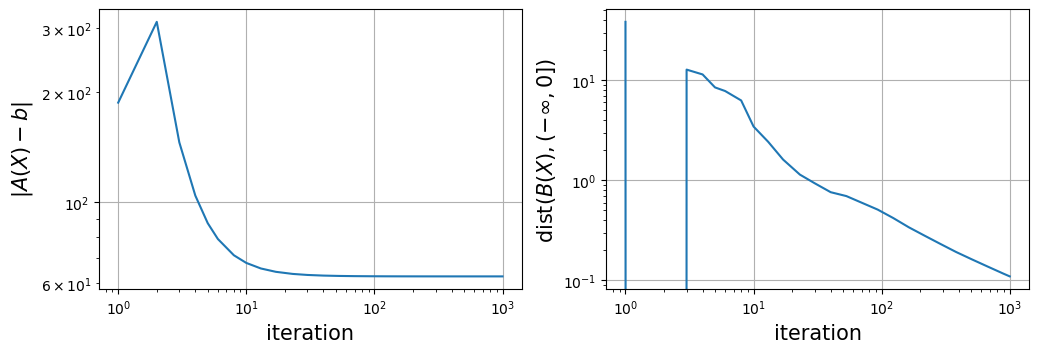

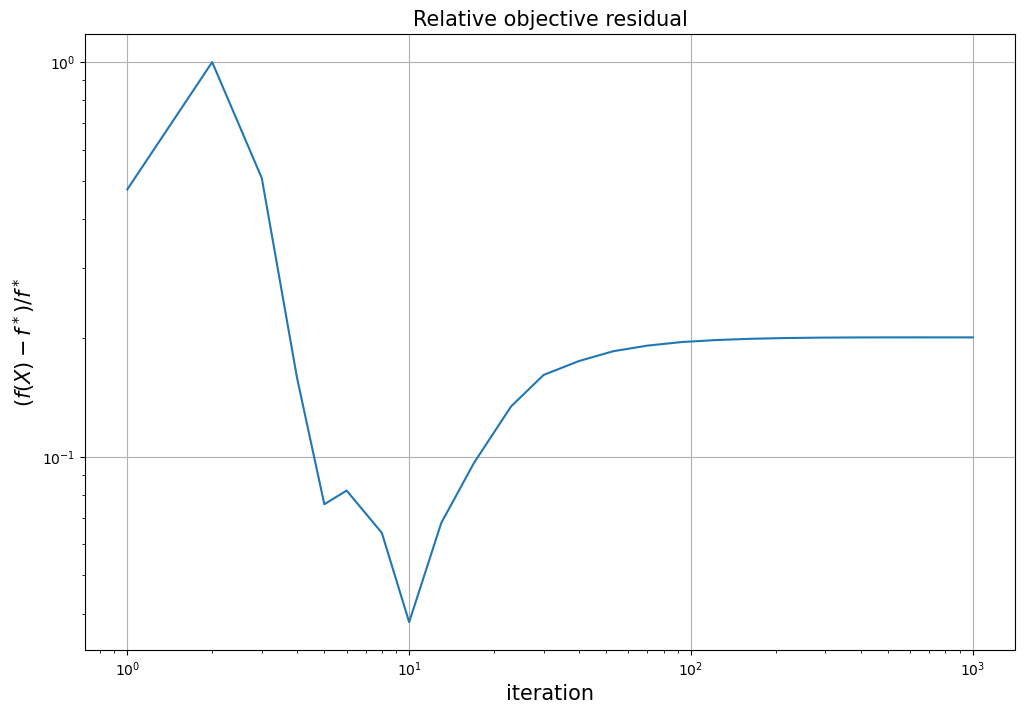

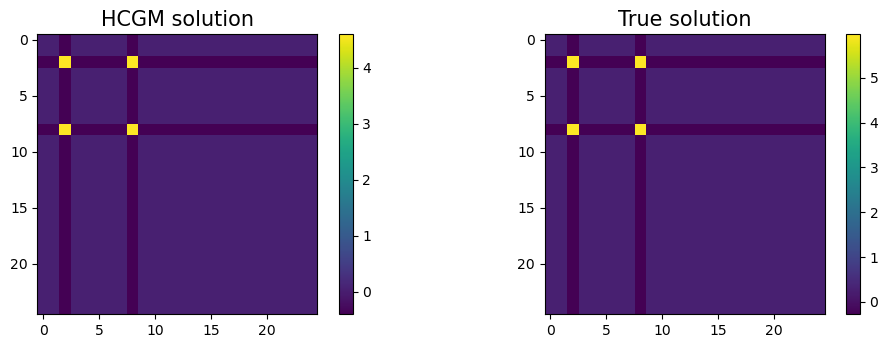


HCGM finished. Running time: 49.17677116394043 seconds.


In [16]:
# using the same global value of kappa as in part 2
kappa = 10
problem = construct_problem('lib/part3/data/25mammalia-primate-association-13.mat')
run_HCGM(problem, HCGM, maxit=int(1e3), beta0=5)

  0%|          | 0/1000 [00:00<?, ?it/s]

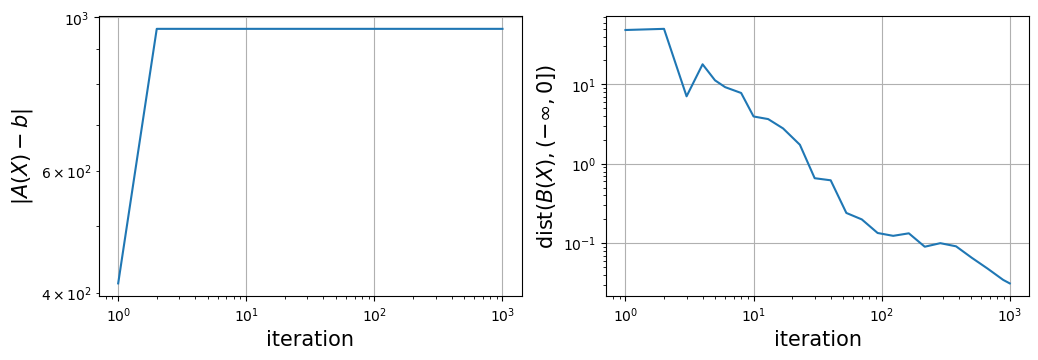

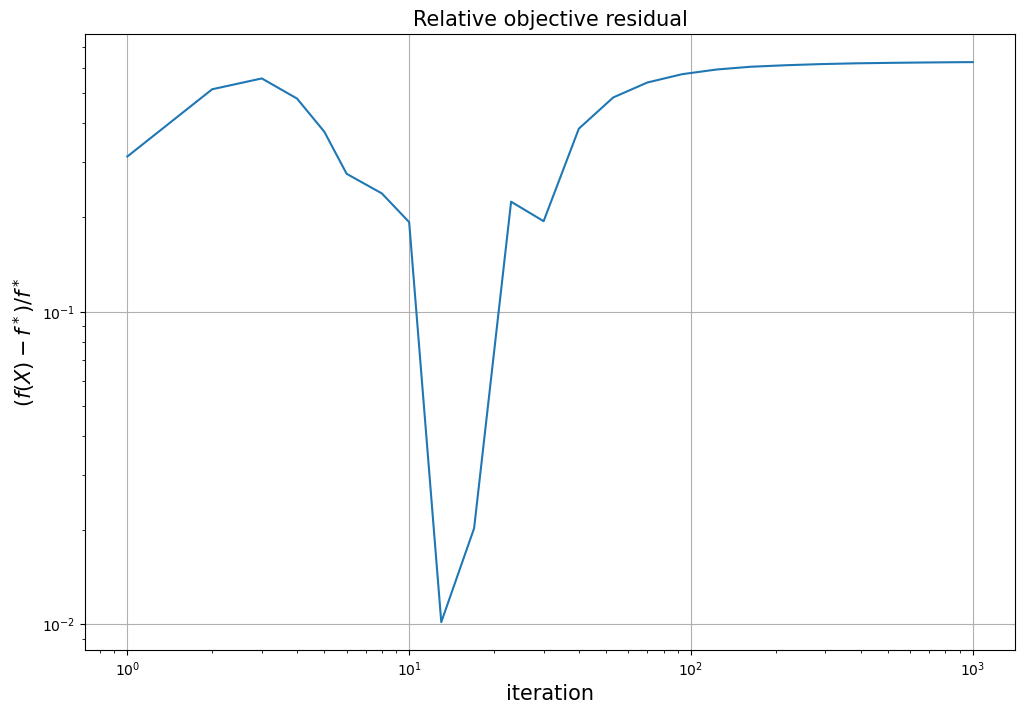

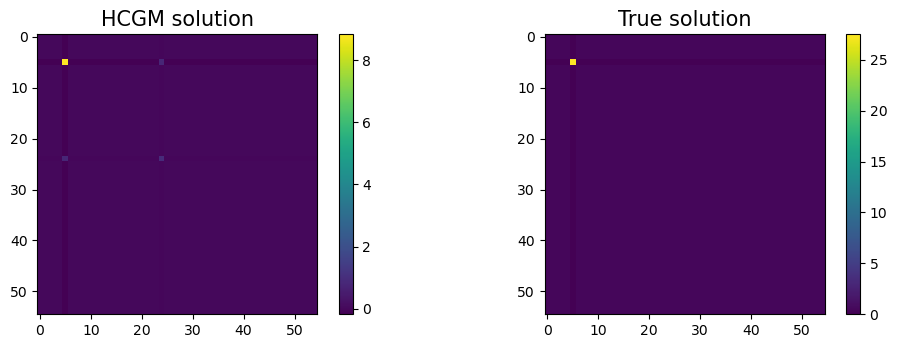


HCGM finished. Running time: 509.04707312583923 seconds.


In [17]:
problem = construct_problem('lib/part3/data/55n-insecta-ant-colony1-day37.mat', beta0=5)
run_HCGM(problem, HCGM, maxit=int(1e3))

  0%|          | 0/1000 [00:00<?, ?it/s]

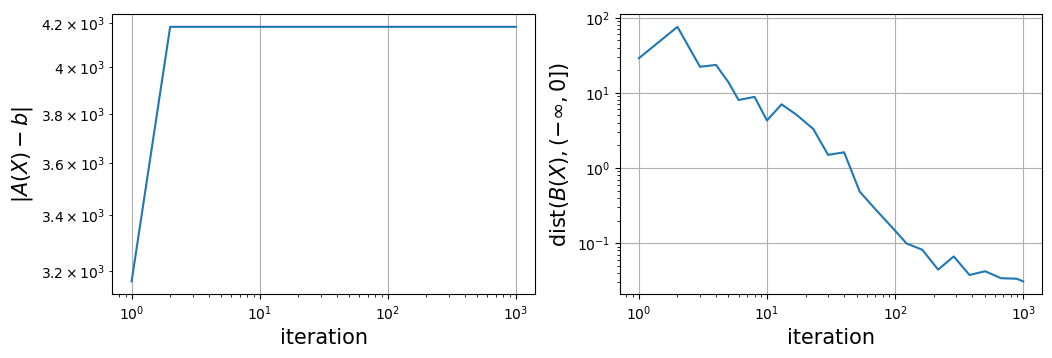

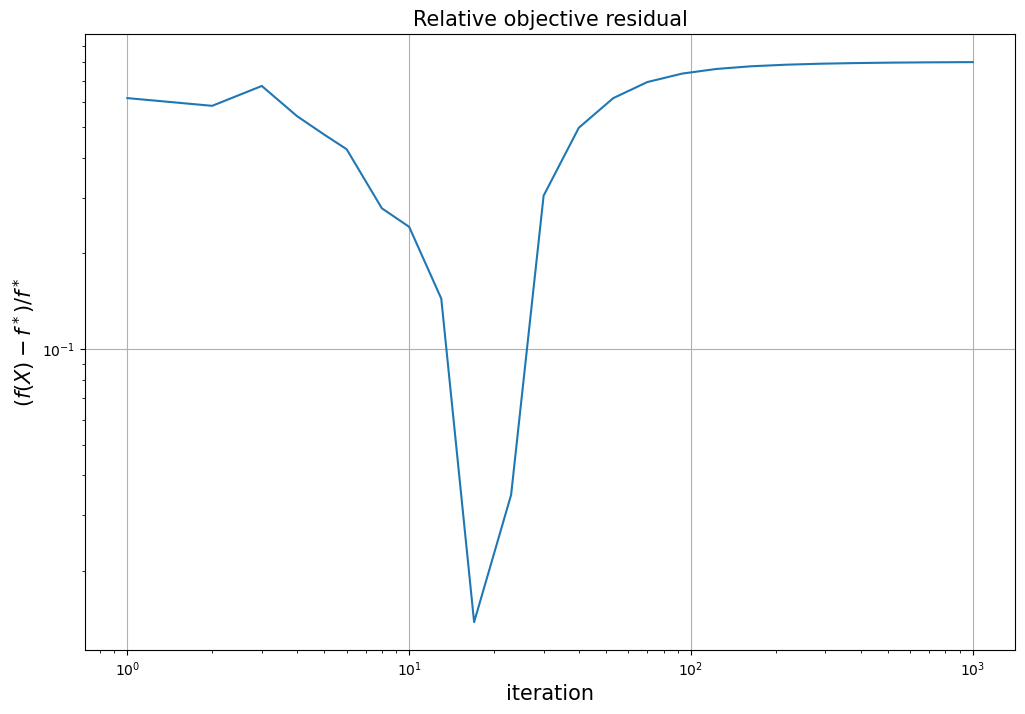

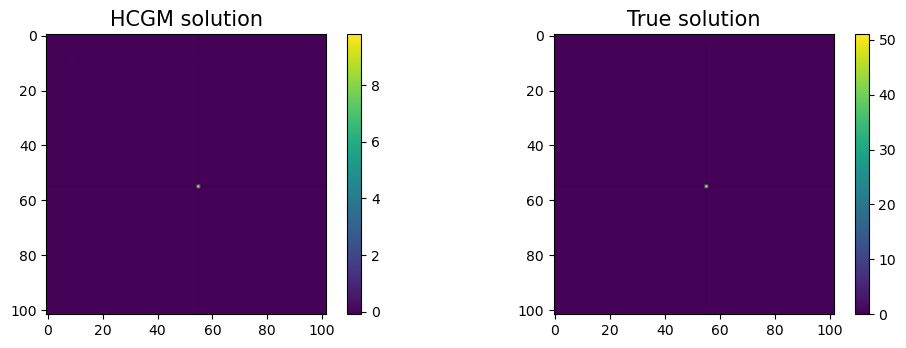


HCGM finished. Running time: 3091.4410831928253 seconds.


In [19]:
problem = construct_problem('lib/part3/data/102n-insecta-ant-colony4-day10.mat', beta0=5)
run_HCGM(problem, HCGM, maxit=int(1e3))

#### Question 3.2.3 (2 points) Running time

What do you notice about the running times of the algorithm for the three
problem instances? 


<font color="blue">
    
HCGM takes the following times for each dataset :
    
G1 (p=25) : 49.17677116394043 seconds

G2 (p=55): 509.04707312583923 seconds

G3 (p=102): 3091.4410831928253 seconds
    
p : 25 $\rightarrow$ 55 the algorithm takes 10x more time to run. 
 
p : 55 $\rightarrow$ 102 the algorithm takes 6x more time to run.
    
 So we notice a supralinear relation between the number of nodes (p) and algorithm run time

#### Question 3.2.4 (3 points) Bottlenecks

What are the potential bottlenecks to applying
this method to large graphs?

<font color="blue">
    
The bottlenecks to applying this method to large graphs are the large storage requirements. Solving the sparsest graph problem using HCGM we need $\mathcal{O}(p^2)$ variables to represent the node embeddings in the form of matrix X, which is a lot of storage when dealing with large graphs. As we have already observed a graph with 100 nodes takes more then 60 mins to run, suggesting very long durations for large graphs. This method does not employ any smart methods to reduce storage which leads to limitations when working with large graphs

One way to address the issues you identified above, especially if
low accuracy suffices, is to resort to stochastic algorithms (the
reasoning here is similar to the one which stands behind GD vs.
SGD). Such an example are the methods proposed
in [@Vladarean2020], where the framework of HCGM is used
in conjunction with stochastic gradients and variance reduction for
alleviating some of the shortcomings of the full-batch method you
implemented above. A brief presentation of these methods is provided
in the supplementary section of Lecture 13.

# References

<div id="refs" class="references csl-bib-body hanging-indent"
role="doc-bibliography">
<div id="ref-arv" class="csl-entry" role="doc-biblioentry">
[@Arora2009] Arora, Sanjeev, Satish Rao, and Umesh Vazirani. 2009. <span>“Expander
Flows, Geometric Embeddings and Graph Partitioning.”</span> <em>Journal
of the ACM (JACM)</em> 56 (2): 5.
</div>
<div id="ref-chatziafratis2018hierarchical" class="csl-entry"
role="doc-biblioentry">
[@Chatziafratis2018] Chatziafratis, Vaggos, Rad Niazadeh, and Moses Charikar. 2018.
<span>“Hierarchical Clustering with Structural Constraints.”</span>
<em>arXiv Preprint arXiv:1805.09476</em>.
</div>
<div id="ref-dasgupta2016cost" class="csl-entry" role="doc-biblioentry">
[@Dasgupta2016] Dasgupta, Sanjoy. 2016. <span>“A Cost Function for Similarity-Based
Hierarchical Clustering.”</span> In <em>Proceedings of the Forty-Eighth
Annual ACM Symposium on Theory of Computing</em>, 118–27.
</div>
<div id="ref-nr" class="csl-entry" role="doc-biblioentry">
[@Rossi2015] Rossi, Ryan A., and Nesreen K. Ahmed. 2015. <span>“The Network Data
Repository with Interactive Graph Analytics and Visualization.”</span>
In <em>AAAI</em>. <a
href="http://networkrepository.com">http://networkrepository.com</a>.
</div>
<div id="ref-vladarean2020conditional" class="csl-entry"
role="doc-biblioentry">
[@Vladarean2020] Vladarean, Maria-Luiza, Ahmet Alacaoglu, Ya-Ping Hsieh, and Volkan
Cevher. 2020. <span>“Conditional Gradient Methods for Stochastically
Constrained Convex Minimization.”</span> In <em>International Conference
on Machine Learning</em>, 9775–85. PMLR.
</div>
</div>